<a href="https://colab.research.google.com/github/sid-betalol/CS6910-FODL-Assignment1/blob/main/cs6910_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**wandb setup**

In [ ]:
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.8 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=4a836d9ea2b97001c7e22d866f3a00b214b891c16a723d7d645fac894461b885
  Stored in directory: /root/.cache/pip/wheels/4c/8e/7e/72fbc243e1aeecae64a96875432e70d4e92f3d2d18123be004
Successfully built pathtools


In [ ]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

###**Importing the required libraries and dataset**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#**Getting and exploring the data**

In [ ]:
from keras.datasets import fashion_mnist
np.random.seed(42)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print('Train Data:')
print('X:', x_train.shape)
print('Y:', y_train.shape)
print()
print('Test Data:')
print('X:', x_test.shape)
print('Y:', y_test.shape)

Train Data:
X: (60000, 28, 28)
Y: (60000,)

Test Data:
X: (10000, 28, 28)
Y: (10000,)


###**Classwise Sample from data**

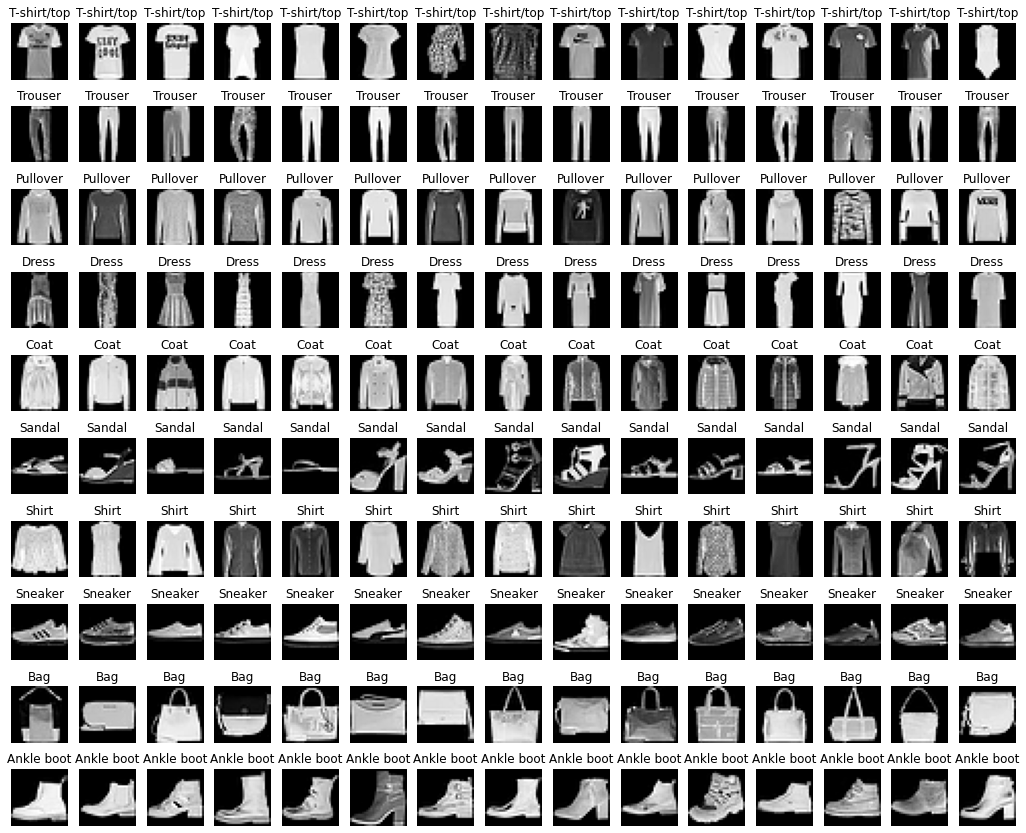

In [ ]:
# y_train is used instead of y_test, as training data is expected
# to have samples from every class unlike the test data
num_labels = np.unique(y_train).shape[0]
# print(num_labels) ## prints 10 in accordance with the keras dataset
labels = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot',
    ]
def show_samples(n, X = x_train, Y = y_train, n_classes = num_labels, classes = labels):
    # n : number of samples to be shown from each class
    
    # samples divided by class
    labelled_data = {i: x_train[y_train==i] for i in range(n_classes)}
    
    # maximum number of available samples in each class  
    max_samples = {i:len(labelled_data[i]) for i in range(n_classes)}

    # samples from class to be shown in random order
    shuffled_indices = {i: np.random.permutation(max_samples[i]) for i in range(n_classes)}
    
    # maximum number of available samples will be shown if the user 
    # asks for more samples than available to be shown
    num_samples = {i: min(max_samples[i], n) for i in range(n_classes)}

    fig, axs = plt.subplots(nrows = 10, ncols = max(num_samples.values()), figsize=(1.2*max(num_samples.values()), 15))
    for i in range(10):
        for j in range(num_samples[i]):
            img = labelled_data[i][shuffled_indices[i][j]].astype(np.uint8).reshape(28, 28)
            axs[i, j].imshow(img, cmap="gray")
            axs[i, j].axis("off")
            axs[i, j].set_title(classes[i])
    plt.show()

show_samples(15)

##**Template Class for Activation Functions**

In [ ]:
class daddyActivation():
    def __init__(self, *args, **kwargs):
        """
        Constructor
        """
        self.grads = {}
        self.backprop_cache = {}

    def __call__(self, *args, **kwargs):
        """
        Calling the class as a function instance
        does a forward and a backward pass
        """
        op = self.forward(*args, **kwargs)
        self.grads = self.calc_grads(*args, **kwargs)
        return op

    def forward(self, *args, **kwargs):
        """
        Defining the forward pass of the activation function
        """
        pass
    
    def calc_grads(self, *args, **kwargs):
        """
        Calculates the gradient of the activation function
        with respect to its input
        """
        pass
    
    def backward(self, *args, **kwargs):
        """ 
        Calculates the gradients of the loss with respect 
        to the input of the activation function, using the gradients 
        computed in the calc_grads method
        """
        pass

###**Activation Functions**

In [ ]:
class sigmoid(daddyActivation):
    
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.backprop_cache = 1/(1+np.exp(-x))
        return self.backprop_cache

    def calc_grads(self, x):
        id = "x"
        y = self.backprop_cache
        diff = y*(1-y)
        return {id:diff}

    def backward(self, yhat):
        return self.grads['x']*yhat


class tanh(daddyActivation):
    
    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.backprop_cache = (np.exp(x) - np.exp(-x))/(np.exp(-x)+np.exp(x))
        return self.backprop_cache

    def calc_grads(self, x):
        id = "x"
        y = self.backprop_cache
        diff = 1- y**2
        return {id:diff}

    def backward(self, yhat):
        return self.grads['x']*yhat


class relu(daddyActivation):

    def __init__(self):
        super().__init__()

    def forward(self, x):
        self.backprop_cache = np.maximum(x, 0.0)
        return self.backprop_cache

    def calc_grads(self,x):
        id = "x"
        y = self.backprop_cache
        diff = (y > 0).astype("float")
        return {id:diff}

    def backward(self, yhat):
        return self.grads['x']*yhat

##**Template Class for Loss Functions**

In [ ]:
class daddyLoss():
    
    def __init__(self, *args, **kwargs):
        self.grads = {}
        self.backprop_cache = {}

    def __call__(self, y_true, y_pred, *args, **kwargs):
        op = self.forward(y_true, y_pred, *args, **kwargs)
        self.grads = self.calc_grads(y_true, y_pred, *args, **kwargs)
        return op

    def forward(self, y_true, y_pred, *args, **kwargs):
        pass

    def calc_grads(self, y_true, y_pred, *args, **kwargs):
        pass

    def backward(self, *args, **kwargs):
        return self.grads['x']


##**Template Class for Optimizers**

In [ ]:
class daddyOptimizer():
    
    def __init__(self, *args, **kwargs):
        
        self.history = {}

    def iterate(self, layer, *args, **kwargs):
        
        for k, v in layer.weights.items():
            if k in self.history:
                update = self.calc_update(v, self.history[k])
                v = v - update
            self.history[k] = v

    def calc_update(self, weight, history, *args, **kwargs):
        #needs to be overloaded based on the optimizer
        pass

##**Template Class for Layers**

In [ ]:
class daddyLayer():

    def __init__():
        
        self.grads = {}
        self.weights = {}
        self.backprop_cache = {}
        self.optimizer = None

    def __call__(self, *args, **kwargs):

        op = self.forward(*args, **kwargs)
        self.grads = self.calc_grads(*args, **kwargs)
        return op

    def init_weights(self, *args, **kwargs):
        pass

    def forward(self, *args, **kwargs):
        pass

    def calc_grads(self, *args, **kwargs):
        pass

    def backward(self, *args, **kwargs):
        pass

    def update_weights(self, *args, **kwargs):
        self.optimizer.iterate(self)